**1. Linear regression**

*Aggregation by suburbs*

For this model we add `Air_log_price_suburb_same_room_type` to the baseline model. **All subsequent model are built by the same logic.**

Untransformed
-------------
R2 train: 0.61 / RMSE train 0.17 / MAE train 0.13 / Nobs: 14261
R2 test: 0.63 / RMSE test 0.16 / MAE test 0.12 / Nobs: 4451

Transformed
-----------
R2 train: 0.48 / RMSE train 62.05 / MAE train 37.72 / Nobs: 14261
R2 test: 0.49 / RMSE test 61.13 / MAE test 36.77 / Nobs: 4451



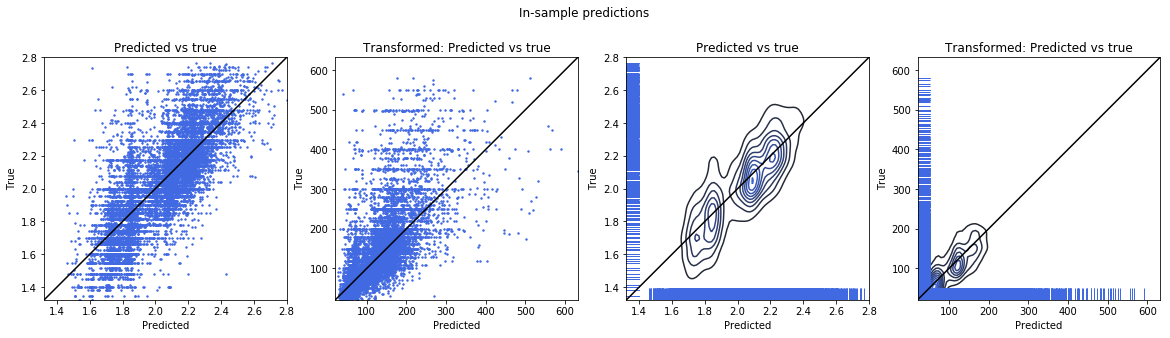

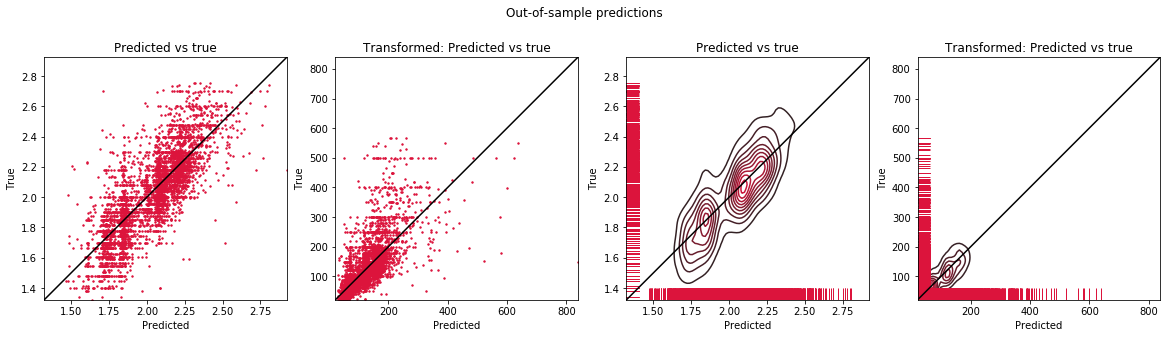

In [279]:
train_tpl = (X_train_suburb, y_train_suburb)
test_tpl = (X_test_suburb, y_test_suburb)
lin_reg_suburb = print_results('linear_regression_suburbs.p', test_tpl, train_tpl, 'both', True)

In [280]:
#lin_reg_suburb['fitted_model'].coef_
df = pd.DataFrame(data={'Coefficient': list(lin_reg_suburb['fitted_model'].coef_)})
df.index = [c for c in list(train_suburb.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_suburb_same_room_type,-0.013365
Air_calculated_host_listings_count,-0.000135
Air_bathrooms,0.041762
Air_beds,-0.003760
Air_bedrooms,0.071661
Air_accommodates,0.017751
Air_extra_people,0.000388
Air_guests_included,0.005731
Air_distance_to_CBD,-0.003750
Air_property_type_2_House_Cottage_Villa,0.009588


Again, we take a look at the results obtained from the `statsmodels` package. We see that the new variable `Air_log_price_suburb_same_room_type` is not significant. This is not surprising since all or at least a lot of information of this new variable is already covered by `Air_neighbourhood_cleansed` and `Air_room_type`.

<!--- However, `Air_room_type` is no longer significant and the coefficient of the intercept is smaller than in the baseline model. This is reasonable since most of the information of the intercept and of `Air_room_type` is now stored in `Air_log_price_suburb_same_room_type`. However, the new approach is different to the baseline by aggregating the log airbnb for the different suburbs w.r.t the different room types. This has a positive effect on the accuracy of the prediction. 
--->

`statsmodels` throws a again a warning that there might be a multicollinearity problem, which could lead to biased coefficient and error estimations. Therefore, coefficients and errors might be wrong and so the conclusion that the variable `Air_log_price_suburb_same_room_type` is not really relevant.

<!--- In the next cell, we solve this problem and one can see that coefficient of `Air_log_price_suburb_same_room_type` is only slightly affected. Thus, this new variable seems to be important.
--->

In [281]:
X, y = prepare_datasets(X_train_suburb, y_train_suburb)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = [c for c in train_suburb.columns if c != 'Air_log_price']
y.columns = ['Air_log_price']
X = sm.add_constant(X)
lin_reg_suburb_sm = sm.OLS(y, X).fit()
print(lin_reg_suburb_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          Air_log_price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     488.8
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:10:33   Log-Likelihood:                 5144.2
No. Observations:               14261   AIC:                        -1.020e+04
Df Residuals:                   14215   BIC:                            -9848.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

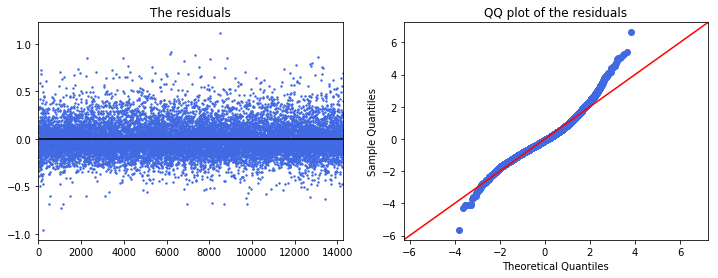

In [282]:
mean = np.mean(lin_reg_suburb_sm.resid)
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(x=range(lin_reg_suburb_sm.resid.shape[0]), y=lin_reg_suburb_sm.resid, alpha=1, s=2, color=col1)
ax[0].set_title("The residuals")
ax[0].axhline(mean, color='black')
ax[0].set_xlim(0, lin_reg_suburb_sm.resid.shape[0])
stdized = (lin_reg_suburb_sm.resid - np.mean(lin_reg_suburb_sm.resid)) / np.std(lin_reg_suburb_sm.resid)
sm.qqplot(stdized, line='45', color=col1, ax=ax[1])
ax[1].set_title("QQ plot of the residuals");

*Constructed aggregation - 500m*

Untransformed
-------------
R2 train: 0.63 / RMSE train 0.16 / MAE train 0.12 / Nobs: 13230
R2 test: 0.64 / RMSE test 0.16 / MAE test 0.12 / Nobs: 3739

Transformed
-----------
R2 train: 0.50 / RMSE train 60.72 / MAE train 36.82 / Nobs: 13230
R2 test: 0.51 / RMSE test 60.33 / MAE test 36.13 / Nobs: 3739



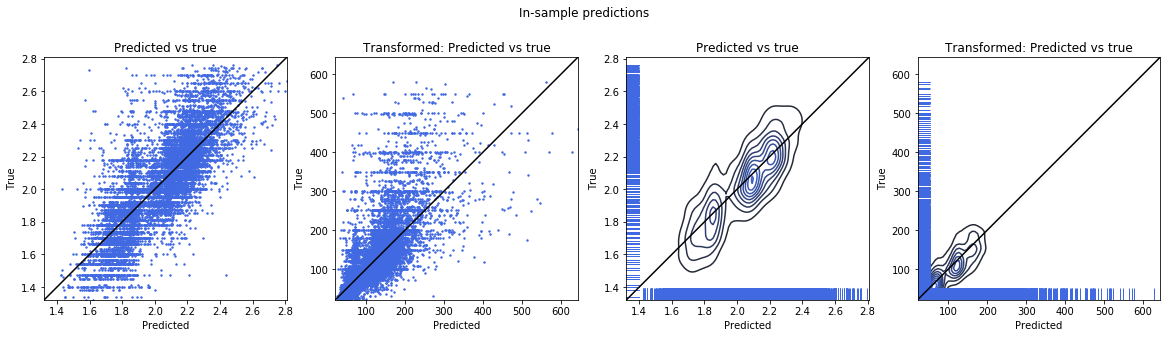

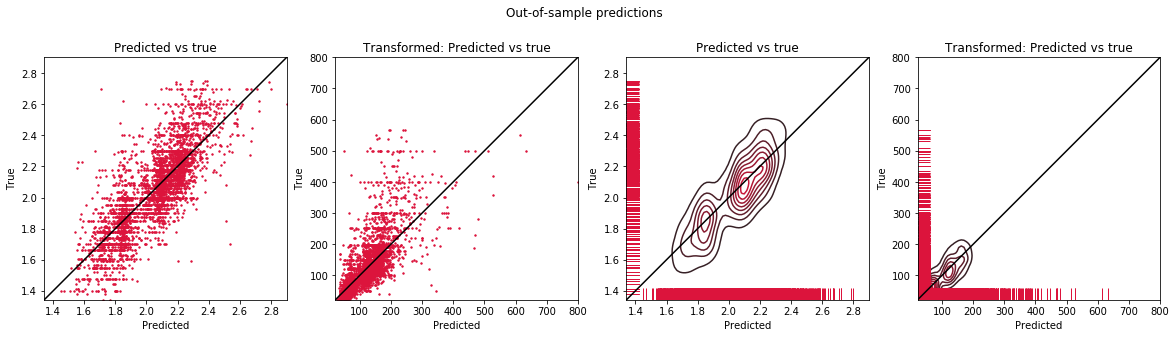

In [283]:
train_tpl = (X_train_500m, y_train_500m)
test_tpl = (X_test_500m, y_test_500m)
lin_reg_500m = print_results('linear_regression_500m.p', test_tpl, train_tpl, 'both', True)

In [284]:
df = pd.DataFrame(data={'Coefficient': list(lin_reg_500m['fitted_model'].coef_)})
df.index = [c for c in list(train_500m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_500m_same_room_type,0.347770
Air_calculated_host_listings_count,-0.000149
Air_bathrooms,0.039777
Air_beds,-0.002011
Air_bedrooms,0.071294
Air_accommodates,0.015253
Air_extra_people,0.000321
Air_guests_included,0.005978
Air_distance_to_CBD,-0.004445
Air_property_type_2_House_Cottage_Villa,0.018695


In contrast to `Air_log_price_suburb_same_room_type`, the variable `Air_log_price_500m_same_room_type` seems to add information to the model since it is highly signifcant. The sign of the coefficient is positive which perfectly fits to our expectation that airbnb prices are higher when neigbouring accommodations costs more and vice versa. `statsmodels` throws again a warning that there might be a multicollinearity problem.

In [285]:
X, y = prepare_datasets(X_train_500m, y_train_500m)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = [c for c in train_500m.columns if c != 'Air_log_price']
y.columns = ['Air_log_price']
X = sm.add_constant(X)
lin_reg_500m_sm = sm.OLS(y, X).fit()
print(lin_reg_500m_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          Air_log_price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     492.9
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:11:04   Log-Likelihood:                 5286.5
No. Observations:               13230   AIC:                        -1.048e+04
Df Residuals:                   13184   BIC:                        -1.014e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

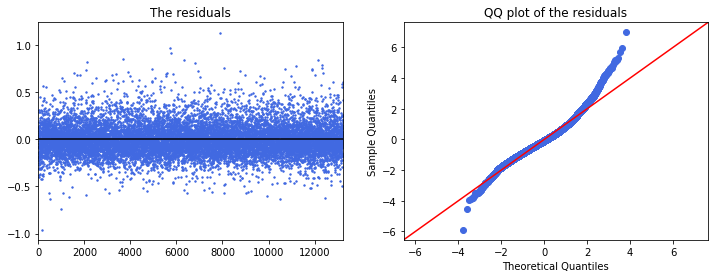

In [286]:
mean = np.mean(lin_reg_500m_sm.resid)
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(x=range(lin_reg_500m_sm.resid.shape[0]), y=lin_reg_500m_sm.resid, alpha=1, s=2, color=col1)
ax[0].set_title("The residuals")
ax[0].axhline(mean, color='black')
ax[0].set_xlim(0, lin_reg_500m_sm.resid.shape[0])
stdized = (lin_reg_500m_sm.resid - np.mean(lin_reg_500m_sm.resid)) / np.std(lin_reg_500m_sm.resid)
sm.qqplot(stdized, line='45', color=col1, ax=ax[1])
ax[1].set_title("QQ plot of the residuals");

*Constructed aggregation - 100m*

Untransformed
-------------
R2 train: 0.61 / RMSE train 0.15 / MAE train 0.11 / Nobs: 9203
R2 test: 0.62 / RMSE test 0.14 / MAE test 0.11 / Nobs: 2177

Transformed
-----------
R2 train: 0.49 / RMSE train 59.29 / MAE train 36.10 / Nobs: 9203
R2 test: 0.52 / RMSE test 53.67 / MAE test 34.18 / Nobs: 2177



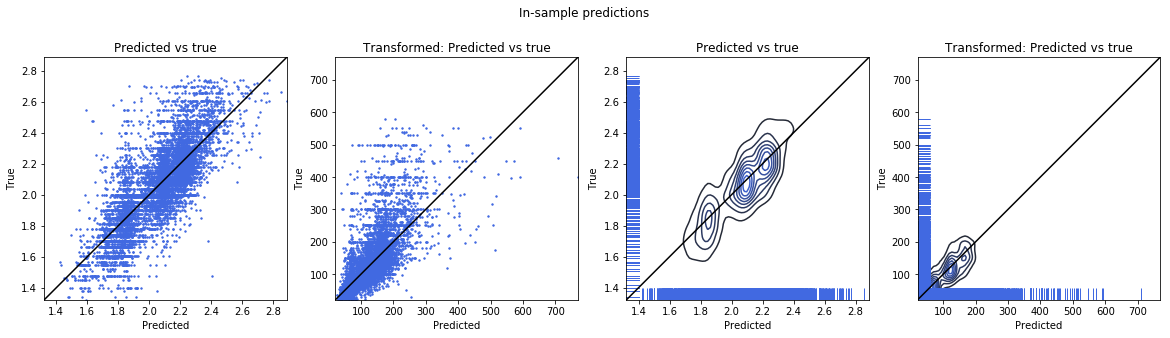

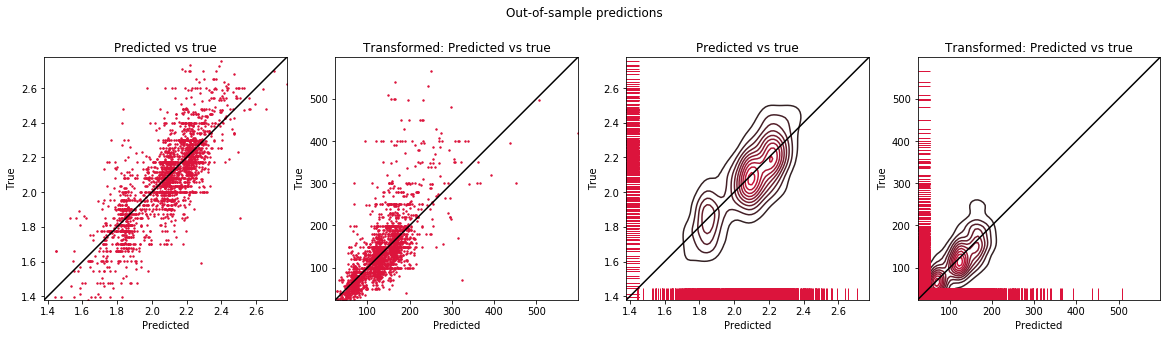

In [287]:
train_tpl = (X_train_100m, y_train_100m)
test_tpl = (X_test_100m, y_test_100m)
lin_reg_100m = print_results('linear_regression_100m.p', test_tpl, train_tpl, 'both', True)

In [288]:
lin_reg_100m['fitted_model'].coef_
df = pd.DataFrame(data={'Coefficient': list(lin_reg_100m['fitted_model'].coef_)})
df.index = [c for c in list(train_100m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_100m_same_room_type,0.242209
Air_calculated_host_listings_count,-0.000218
Air_bathrooms,0.041013
Air_beds,0.003598
Air_bedrooms,0.082786
Air_accommodates,0.009494
Air_extra_people,0.000354
Air_guests_included,0.004541
Air_distance_to_CBD,-0.007401
Air_property_type_2_House_Cottage_Villa,0.007908


In [289]:
X, y = prepare_datasets(X_train_100m, y_train_100m)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = [c for c in train_100m.columns if c != 'Air_log_price']
y.columns = ['Air_log_price']
X = sm.add_constant(X)
lin_reg_100m_sm = sm.OLS(y, X).fit()
print(lin_reg_100m_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          Air_log_price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     323.2
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:11:29   Log-Likelihood:                 4186.1
No. Observations:                9203   AIC:                            -8280.
Df Residuals:                    9157   BIC:                            -7952.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

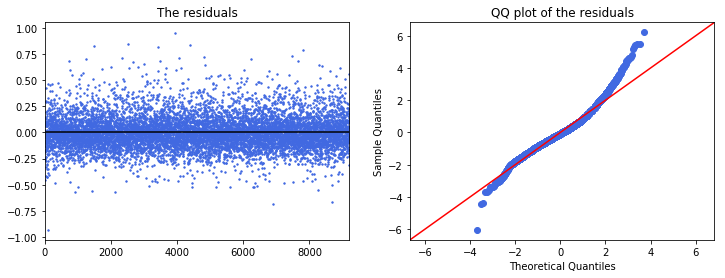

In [290]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(x=range(lin_reg_100m_sm.resid.shape[0]), y=lin_reg_100m_sm.resid, alpha=1, s=2, color=col1)
ax[0].set_title("The residuals")
ax[0].axhline(mean, color="black")
ax[0].set_xlim(0, lin_reg_100m_sm.resid.shape[0]) 
stdized = (lin_reg_100m_sm.resid - np.mean(lin_reg_100m_sm.resid)) / np.std(lin_reg_100m_sm.resid)
sm.qqplot(stdized, line='45', color=col1, ax=ax[1])
ax[1].set_title("QQ plot of the residuals");

*Constructed aggregation - 50m*

Untransformed
-------------
R2 train: 0.59 / RMSE train 0.15 / MAE train 0.11 / Nobs: 6522
R2 test: 0.62 / RMSE test 0.14 / MAE test 0.10 / Nobs: 1340

Transformed
-----------
R2 train: 0.47 / RMSE train 58.91 / MAE train 35.92 / Nobs: 6522
R2 test: 0.51 / RMSE test 50.96 / MAE test 32.90 / Nobs: 1340



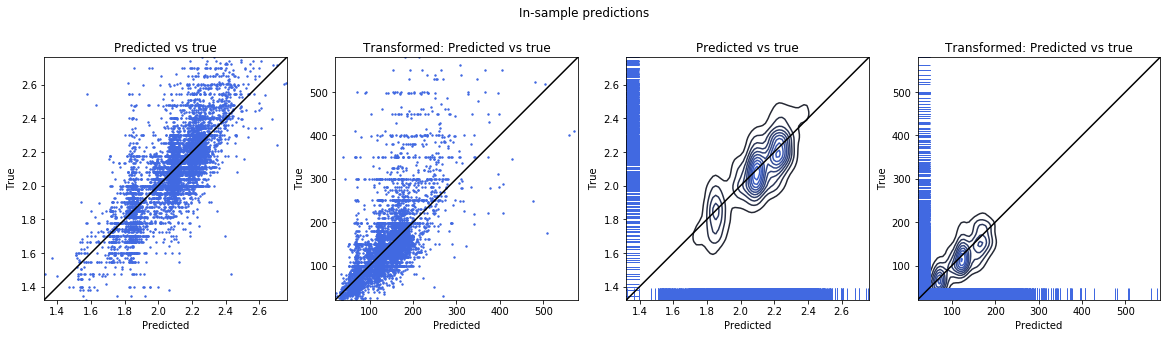

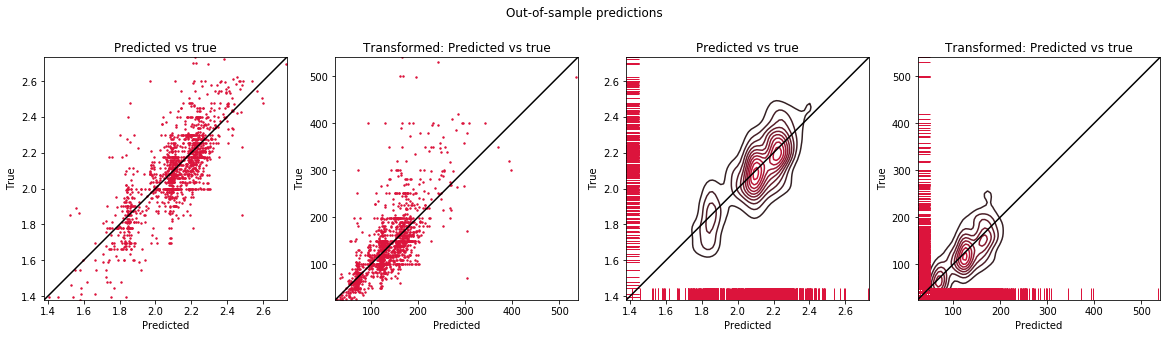

In [291]:
train_tpl = (X_train_50m, y_train_50m)
test_tpl = (X_test_50m, y_test_50m)
lin_reg_50m = print_results('linear_regression_50m.p', test_tpl, train_tpl, 'both', True)

In [292]:
lin_reg_50m['fitted_model'].coef_
df = pd.DataFrame(data={'Coefficient': list(lin_reg_50m['fitted_model'].coef_)})
df.index = [c for c in list(train_50m.columns) if c != 'Air_log_price']
df

,Coefficient
Air_log_price_50m_same_room_type,0.129834
Air_calculated_host_listings_count,-0.000268
Air_bathrooms,0.043615
Air_beds,0.005969
Air_bedrooms,0.087004
Air_accommodates,0.005878
Air_extra_people,0.000401
Air_guests_included,0.005479
Air_distance_to_CBD,-0.009030
Air_property_type_2_House_Cottage_Villa,0.007927


In [293]:
X, y = prepare_datasets(X_train_50m, y_train_50m)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = [c for c in train_50m.columns if c != 'Air_log_price']
y.columns = ['Air_log_price']
X = sm.add_constant(X)
lin_reg_50m_sm = sm.OLS(y, X).fit()
print(lin_reg_50m_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          Air_log_price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     209.9
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:11:47   Log-Likelihood:                 3186.8
No. Observations:                6522   AIC:                            -6282.
Df Residuals:                    6476   BIC:                            -5970.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

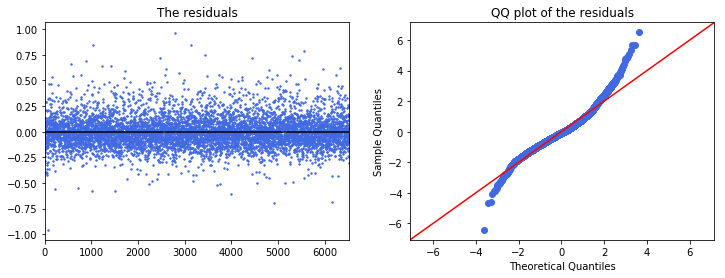

In [294]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
mean = np.mean(lin_reg_50m_sm.resid)
ax[0].scatter(x=range(lin_reg_50m_sm.resid.shape[0]), y=lin_reg_50m_sm.resid, alpha=1, s=2, color=col1)
ax[0].set_title("The residuals")
ax[0].axhline(mean, color="black")
ax[0].set_xlim(0, lin_reg_50m_sm.resid.shape[0])
stdized = (lin_reg_50m_sm.resid - np.mean(lin_reg_50m_sm.resid)) / np.std(lin_reg_50m_sm.resid)
sm.qqplot(stdized, line='45', color=col1, ax=ax[1])
ax[1].set_title("QQ plot of the residuals");